# Kepler Analysis (Exoplanets HW4)
#### Dillon Bass, 1/28/25

## Setup and Data Reading

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
import math
warnings.filterwarnings("ignore")

In [2]:
starspath = 'keplerstars.txt'
starsall = pd.read_fwf(
    starspath,
    skiprows=204,
    header=0 )
starsall.columns = [col.strip("| ").strip() for col in starsall.columns]
starsall2 = starsall.iloc[5:].reset_index(drop=True)
starsall2['teff'] = pd.to_numeric(starsall2['teff'], errors='coerce')
starsall2['logg'] = pd.to_numeric(starsall2['logg'], errors='coerce')
starsall2['kepmag'] = pd.to_numeric(starsall2['kepmag'], errors='coerce')
starsall2 = starsall2.dropna(subset=['teff', 'logg', 'kepmag'])

# make the suggested cuts for Teff, log g, and kepler magnitude  'logg':[4, 4.9], 'teff':[4100, 6100], 'kepmag': < 15. 
stars_teff_cut = starsall2.loc[(starsall2['teff'] >= 4100) & (starsall2['teff'] <= 6100)]
stars_logg_cut = stars_teff_cut.loc[(stars_teff_cut['logg'] >= 4) & (stars_teff_cut['logg'] <= 4.9)]
stars = stars_logg_cut.loc[stars_logg_cut['kepmag'] < 15] 

In [3]:
koispath = 'allkeplerois.csv'
koisall = pd.read_csv(koispath, skiprows=range(0, 55), header=0, comment='#',engine='python')

In [4]:
# we can just filter out all the 'FALSE POSITIVE' flagged candidates.
kois = (koisall[(koisall['koi_pdisposition'].isin(['CONFIRMED', 'CANDIDATE'])) & (koisall['koi_pdisposition'] != 'FALSE POSITIVE')]).reset_index(drop=True)
list(set(list(kois['koi_disposition'])))

['CONFIRMED', 'FALSE POSITIVE', 'CANDIDATE']

In [5]:
kois

,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,10811496,K00753.01,NaN,CANDIDATE,CANDIDATE,0.000,0,0,0,0,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,10872983,K00756.01,Kepler-228 d,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,-232.0,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4712,9938836,K07978.01,NaN,CANDIDATE,CANDIDATE,0.843,0,0,0,0,...,-242.0,3.890,0.405,-0.135,2.219,0.536,-0.996,285.30768,46.829803,13.729
4713,10011213,K07982.01,NaN,CANDIDATE,CANDIDATE,0.189,0,0,0,0,...,-225.0,4.488,0.054,-0.216,0.955,0.291,-0.097,291.60455,46.973289,15.632
4714,10028127,K08193.01,NaN,CANDIDATE,CANDIDATE,0.519,0,0,0,0,...,-166.0,4.561,0.030,-0.170,0.855,0.207,-0.069,297.73398,46.961529,15.719
4715,10128825,K07986.01,NaN,CANDIDATE,CANDIDATE,0.497,0,0,0,0,...,-220.0,4.444,0.056,-0.224,1.031,0.341,-0.114,286.50937,47.163219,14.757


In [6]:
kois.columns

Index(['kepid', 'kepoi_name', 'kepler_name', 'koi_disposition',
       'koi_pdisposition', 'koi_score', 'koi_fpflag_nt', 'koi_fpflag_ss',
       'koi_fpflag_co', 'koi_fpflag_ec', 'koi_period', 'koi_period_err1',
       'koi_period_err2', 'koi_time0bk', 'koi_time0bk_err1',
       'koi_time0bk_err2', 'koi_impact', 'koi_impact_err1', 'koi_impact_err2',
       'koi_duration', 'koi_duration_err1', 'koi_duration_err2', 'koi_depth',
       'koi_depth_err1', 'koi_depth_err2', 'koi_prad', 'koi_prad_err1',
       'koi_prad_err2', 'koi_teq', 'koi_teq_err1', 'koi_teq_err2', 'koi_insol',
       'koi_insol_err1', 'koi_insol_err2', 'koi_model_snr', 'koi_tce_plnt_num',
       'koi_tce_delivname', 'koi_steff', 'koi_steff_err1', 'koi_steff_err2',
       'koi_slogg', 'koi_slogg_err1', 'koi_slogg_err2', 'koi_srad',
       'koi_srad_err1', 'koi_srad_err2', 'ra', 'dec', 'koi_kepmag'],
      dtype='object')

I've loaded in the Kepler stars list and the list of all Kepler candidates of any disposition and filtered out the false positives. This is easier than seperately loading the confirmed and candidate lists and then trying to merge them, and this has all the required information I think. For the stars, I applied the filters for magnitude, temperature, and logg as described in the directions. I forgot to make those cuts the first time, hopefully I don't break everything... 

## Recreation of Figure 5

Here I've recreated figure 5 from Howard et al. showing planet occurance as a function of planet radius for planets with periods less than 50 days.

* *note that I'm doing figure 4 at the end*

In [7]:
# its slow, but since we need radii, I'll just loop through each star that has kois
stars_with_koi = (stars[pd.to_numeric(stars['nkoi']) > 0]).reset_index(drop=True)
kepids = [int(x) for x in stars_with_koi['kepid'].to_list()] # who made the kepids a str here?!?!?

# limit planets to those with periods less than 50 days 
kois_p50 = kois[kois['koi_period'] < 50]

radii = []
for kepid in kepids:
    rads = ((kois_p50[kois_p50['kepid'] == kepid])['koi_prad']).to_list()
    radii = radii + [x for x in rads if not math.isnan(x)]

radiis = [x for x in radii if x < 23] # for plotting

### Short Correction for Transit Probability that I Forgot the First Time

In [66]:
def sma_calc(m_star, period):
    G = 6.67430e-11  
    M_sun = 1.989e30  
    day_to_sec = 86400  
    AU_to_m = 1.496e11  
    M = m_star * M_sun 
    P = period * day_to_sec
    a_meters = ((G * M * P**2) / (4 * np.pi**2))**(1/3)
    return a_meters / AU_to_m

In [76]:
# compute transit probabilities
probabilities = []
for kepid in kepids:
    periods = list((kois_p50.loc[kois_p50['kepid'] == kepid, 'koi_period'].values))
    if len(periods) > 0:
        m_star = float((list(stars.loc[stars['kepid'] == str(kepid), 'mass'].values))[0])
    smas = []
    for p in periods:
        sma = sma_calc(m_star, p)
        smas.append(sma)
    r_star = float((list(stars_with_koi.loc[stars_with_koi['kepid'] == str(kepid), 'radius'].values))[0]) / 215 # to AU
    for sma in smas:
        prob = r_star / sma
        if not math.isnan(prob):
            probabilities.append(prob)

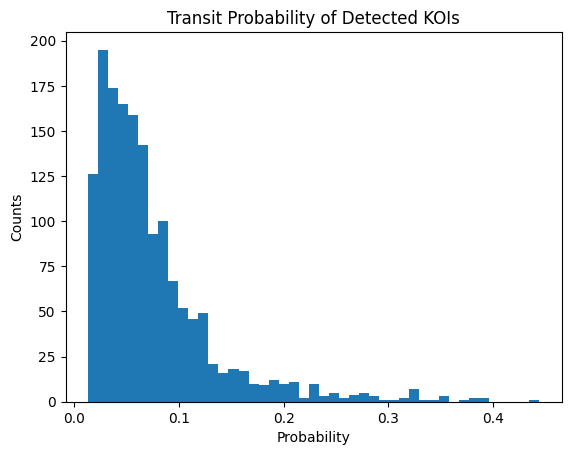

In [77]:
plt.hist(probabilities, bins='auto')
plt.title('Transit Probability of Detected KOIs')
plt.ylabel('Counts')
plt.xlabel('Probability')
plt.show()

In [84]:
mean_prob = np.mean(probabilities)
print(1/np.mean(probabilities))
std_prob = np.std(probabilities)
mini = mean_prob - std_prob
maxi = mean_prob + std_prob
print(1/mini)
print(1/maxi)

13.39542155058975
61.79678629663599
7.5118683488121665


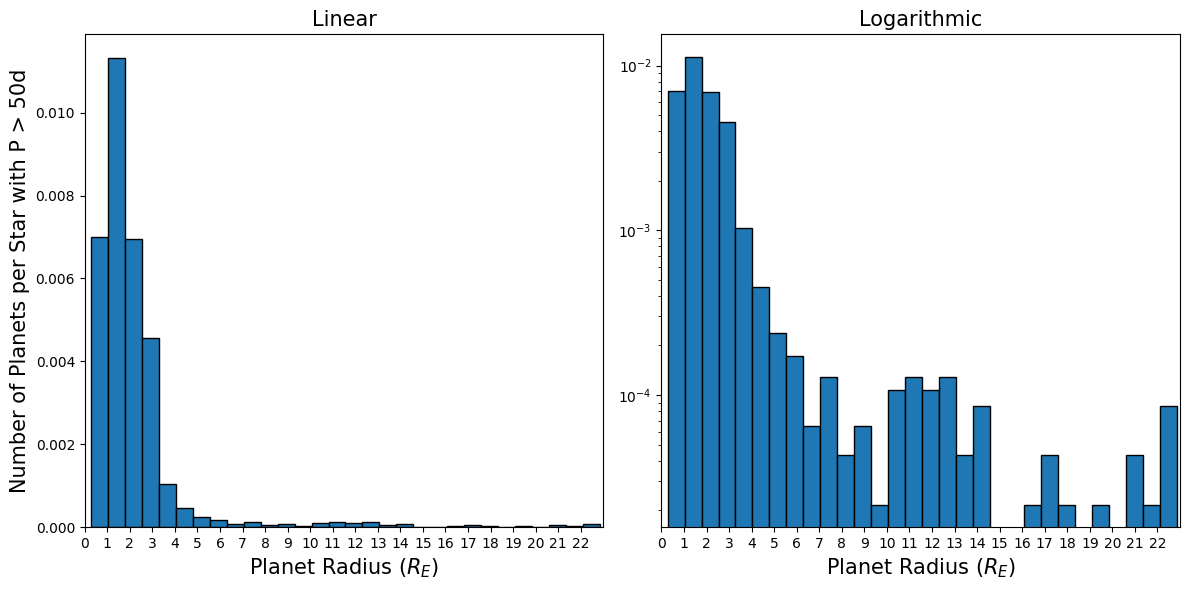

In [297]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
bins = 30
# linear 
axs[0].hist(
    radiis,
    bins=bins,
    weights=([1 / len(stars)] * len(radiis)),
    edgecolor='black',
    align='mid',
)
axs[0].set_xlim([0, 23])
axs[0].set_xticks(np.arange(0, 23))
axs[0].set_title('Linear', fontsize=15)
axs[0].set_ylabel('Number of Planets per Star with P > 50d', fontsize=15)
axs[0].set_xlabel('Planet Radius ($R_E$)', fontsize=15) 

# logarithmic
axs[1].hist(
    radiis,
    bins=bins,
    weights=([1 / len(stars)] * len(radiis)),
    edgecolor='black',
    align='mid',
)
axs[1].set_xlim([0, 23])
axs[1].set_xticks(np.arange(0, 23))
axs[1].set_yscale('log')
#axs[1].set_yticks([.001, .010, .100])
axs[1].set_title('Logarithmic', fontsize=15)
axs[1].set_xlabel('Planet Radius ($R_E$)', fontsize=15)  
plt.tight_layout()
plt.show()

#### Fig 5 Commentary 

These histograms look approximately similar to the ones in Howard et al. though this data has many more planets so I've used more bins than used in the paper. I'm not really sure how they got uncertainties on the histogram values as these are just counts--maybe factoring in unconfirmed candidates? In any case, I've left out the uncertainties. 

In both the linear and logarithmici graphs we see a similar distribution to the paper, though my axis are slightly different. The main difference between the 2012 data and the current set is the higher number of planets with smaller radii. This is expected from the paper's shaded regions of lowered sensitivity. Now that we've collected more data, the histograms peak further towards lower planetary radii. In the current data there is still a drop off towards zero. This could mean that there are still smaller planets to be found in the future, could be an effect off the binning,, or could be a physical reality that below a certain size less than one Earth planets become rarer.

## Recreation of Figure 6

In this figure we plot the number of planets per star with given orbital periods. The code should be pretty similar to what I just did, except for using orbital periods not planetary radii. 

In [216]:
periods_2r32 = []
periods_2r4 = []
periods_4r8 = []
periods_8r32 = []
for kepid in kepids:
    persn = ((kois_p50[kois_p50['kepid'] == kepid])['koi_period']).to_list()
    radsn = ((kois_p50[kois_p50['kepid'] == kepid])['koi_prad']).to_list()
    pers = []
    rads = []
    # clean the nans
    for i, per in enumerate(persn):
        if ((not math.isnan(per)) and (not math.isnan(radsn[i]))):
            pers.append(per)
            rads.append(radsn[i])
    for i, rad in enumerate(rads):
        if (32 > rad > 2):
            periods_2r32.append(pers[i])
        if (4 > rad > 2):
            periods_2r4.append(pers[i])
        if (8 > rad > 4):
            periods_4r8.append(pers[i])
        if (32 > rad > 8):
            periods_8r32.append(pers[i])

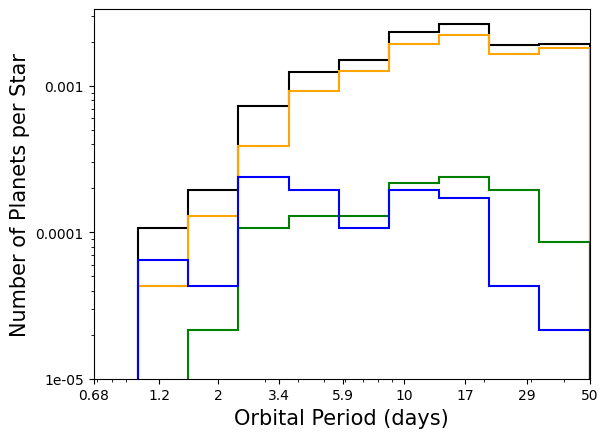

In [219]:
bins = 10
plt.hist(
    periods_2r32,
    bins=np.logspace(0, np.log10(50), num=bins, base=10.0),
    histtype='step',  
    edgecolor='black',  
    linewidth=1.5,
    weights=([1 / len(stars)] * len(periods_2r32)),
)
plt.hist(
    periods_2r4,
    bins=np.logspace(0, np.log10(50), num=bins, base=10.0),
    histtype='step',  
    edgecolor='orange',  
    linewidth=1.5,
    weights=([1 / len(stars)] * len(periods_2r4)),
)
plt.hist(
    periods_4r8,
    bins=np.logspace(0, np.log10(50), num=bins, base=10.0),
    histtype='step',  
    edgecolor='green',  
    linewidth=1.5,
    weights=([1 / len(stars)] * len(periods_4r8)),
)
plt.hist(
    periods_8r32,
    bins=np.logspace(0, np.log10(50), num=bins, base=10.0),
    histtype='step',  
    edgecolor='blue',  
    linewidth=1.5,
    weights=([1 / len(stars)] * len(periods_8r32)),
)
plt.xscale('log')
xticks = [.68, 1.2, 2, 3.4, 5.9, 10, 17, 29, 50] 
plt.xticks(xticks, labels=[str(tick) for tick in xticks])
yticks = [0.00001, 0.0001, .001]  
plt.yscale('log')
plt.yticks(yticks, labels=[str(tick) for tick in yticks])
plt.xlim([.68, 50])

plt.ylabel('Number of Planets per Star', fontsize=15)
plt.xlabel('Orbital Period (days)', fontsize=15)
plt.show()

Wow I really should've just gone to the documentation and realized there was a "cumulative" parameter for histograms that would do effectively exactly what I've done below but just by adding a single parameter to the code I have above... Unfortunately I didn't see that, and to be honest my version looks better and more like the graph in the paper than just turning on that bool anyway. 

In [220]:
# cumulative out to each orbital period specified by a number of bins
bins = 10 
#binranges = np.linspace(0, 50, bins)
binranges = np.logspace(0, np.log10(50), num=bins, base=10.0)
period_groups = [periods_2r32, periods_2r4, periods_4r8, periods_8r32]
pgroup_cumulatives = [[], [], [], []]
for i, group in enumerate(period_groups):
    for maxper in binranges:
        count = len([x for x in period_groups[i] if x < maxper])
        pgroup_cumulatives[i].append(count)

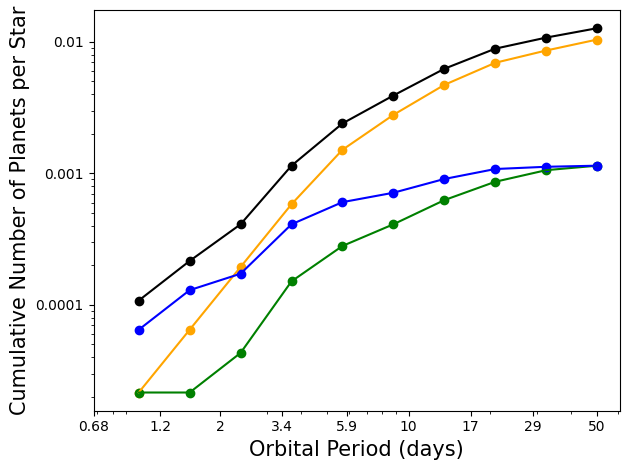

In [221]:
plt.scatter(binranges, np.array(pgroup_cumulatives[0])/len(stars), color='black')
plt.plot(binranges, np.array(pgroup_cumulatives[0])/len(stars), color='black')

plt.scatter(binranges, np.array(pgroup_cumulatives[1])/len(stars), color='orange')
plt.plot(binranges, np.array(pgroup_cumulatives[1])/len(stars), color='orange')

plt.scatter(binranges, np.array(pgroup_cumulatives[2])/len(stars), color='green')
plt.plot(binranges, np.array(pgroup_cumulatives[2])/len(stars), color='green')

plt.scatter(binranges, np.array(pgroup_cumulatives[3])/len(stars), color='blue')
plt.plot(binranges, np.array(pgroup_cumulatives[3])/len(stars), color='blue')

plt.xscale('log')
xticks = [.68, 1.2, 2, 3.4, 5.9, 10, 17, 29, 50]  
plt.xticks(xticks, labels=[str(tick) for tick in xticks])
yticks = [0.0001, 0.001, .01] 
plt.yscale('log')
plt.yticks(yticks, labels=[str(tick) for tick in yticks])


plt.ylabel('Cumulative Number of Planets per Star', fontsize=15)
plt.xlabel('Orbital Period (days)', fontsize=15)
plt.tight_layout()
plt.show()

#### Fig 6 Commentary 

These two figures also look approximately like what is shown in the Howard et al. data from 2012. The main difference is that while the top figure in the paper seems to indicate a flattening off of the number of planets per star vs orbital period that looks approximately squareroot in log-log space, my figure seems to indicate a peak, then a drop off. This is espeicially evident in the 4-8 and 8-32 $R_E$ radius ranges, which show somewhat distinct drop offs by 50 days in my figure. This means that either I did something wrong, or we've discovered a lot more planets with shorter (2-20 day) orbital periods since the figure in the paper. This would make sense since transit surveys, the main thing running since then, are good at discovering shorter period planets. 

In the cumulative graph, my curves look approximately the same as the ones in the paper, though the intersection of the blue and green radius ranges is much later, possibily inidicating increased detection rate for larger (blue) planets recently, which also matches with the transit bias for hot Jupiters. 

## Recreation of Figure 7

Figure 7 shows planet occurance as a function of orbital period with best fit solid curves overlayed that are power laws with exponential cutoffs below a characteristic period. This uses the same points that are plotted in the first graph in figure 6, without the black line that encompasses the entire radius range. 

In [239]:
from scipy.optimize import curve_fit
def plot_poly_fit(bin_edges, bin_heights, color, label):
    valid = bin_heights > 0 
    x = bin_edges[1:][valid] - binwidthoffset 
    y = bin_heights[valid] 

    poly_coeffs = np.polyfit(np.log10(x), np.log10(y), degree) 
    poly_func = np.poly1d(poly_coeffs)

    x_smooth = np.logspace(np.log10(min(x)), np.log10(max(x)), 100)
    y_smooth = 10**poly_func(np.log10(x_smooth))  
    plt.plot(x_smooth, y_smooth, color=color, linestyle='-', label=label, alpha=0.7)

def power_law_exp_cutoff(P, kP, beta, P0, gamma):
    return kP * P**beta * (1 - np.exp(-(P / P0)**gamma))

def plot_power_law_fit(bin_edges, bin_heights, color, label):
    valid = bin_heights > 0 
    x = bin_edges[1:][valid] - binwidthoffset 
    y = bin_heights[valid] 

    initial_guess = [max(y), -1, np.median(x), 1]
    try:
        popt, _ = curve_fit(power_law_exp_cutoff, x, y, p0=initial_guess, maxfev=10000)
    except RuntimeError:
        print("error in power law fit")
        return
    kP, beta, P0, gamma = popt

    x_smooth = np.logspace(np.log10(min(x)), np.log10(max(x)), 100)
    y_smooth = power_law_exp_cutoff(x_smooth, *popt) 
    plt.plot(x_smooth, y_smooth, color=color, linestyle='-', label=label + ' Fit', alpha=0.7)
    print(f"Best-fit parameters for {label}: kP={kP:.3f}, beta={beta:.3f}, P0={P0:.3f}, gamma={gamma:.3f}")

Best-fit parameters for 2R-4R: kP=0.004, beta=-0.247, P0=10.242, gamma=1.977
Best-fit parameters for 4R-8R: kP=0.395, beta=-2.151, P0=25.642, gamma=2.944
Best-fit parameters for 8R-32R: kP=0.000, beta=-0.511, P0=3.153, gamma=5.731


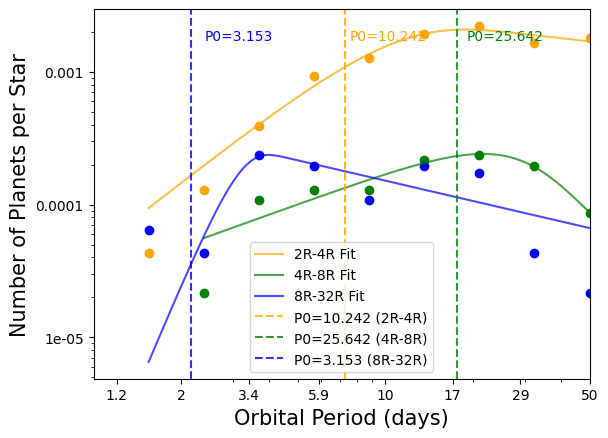

In [308]:
# periods_2r4, periods_4r8, periods_8r32  --> plot these as points 
bins = 10
binwidthoffset = 0 # really this should be an array of some logarithm increasing amount to make the points appear centered in their bins
degree = 1

r2r4 = plt.hist(
    periods_2r4,
    bins=np.logspace(0, np.log10(50), num=bins, base=10.0),
    histtype='step',  
    edgecolor='orange',  
    alpha=0, # turn this back on to see where the histogram bins really are 
    linewidth=1.5,
    weights=([1 / len(stars)] * len(periods_2r4)),
)
plt.scatter(r2r4[1][1:] - binwidthoffset, r2r4[0], color='orange')
#plot_poly_fit(r2r4[1], r2r4[0], 'orange', '2R-4R Fit')
plot_power_law_fit(r2r4[1], r2r4[0], 'orange', '2R-4R')

r4r8 = plt.hist(
    periods_4r8,
    bins=np.logspace(0, np.log10(50), num=bins, base=10.0),
    histtype='step',  
    edgecolor='orange',  
    alpha=0, # turn this back on to see where the histogram bins really are 
    linewidth=1.5,
    weights=([1 / len(stars)] * len(periods_4r8)),
)
plt.scatter(r4r8[1][1:] - binwidthoffset, r4r8[0], color='green')
#plot_poly_fit(r4r8[1], r4r8[0], 'green', '4R-8R Fit')
plot_power_law_fit(r4r8[1], r4r8[0], 'green', '4R-8R')

r8r32 = plt.hist(
    periods_8r32,
    bins=np.logspace(0, np.log10(50), num=bins, base=10.0),
    histtype='step',  
    edgecolor='orange',  
    alpha=0, # turn this back on to see where the histogram bins really are 
    linewidth=1.5,
    weights=([1 / len(stars)] * len(periods_8r32)),
)
plt.scatter(r8r32[1][1:] - binwidthoffset, r8r32[0], color='blue')
#plot_poly_fit(r8r32[1], r8r32[0], 'blue', '8R-32R Fit')
plot_power_law_fit(r8r32[1], r8r32[0], 'blue', '8R-32R')

# not in the graph in the paper
# r2r32 = plt.hist(
#     periods_2r32,
#     bins=np.logspace(0, np.log10(50), num=bins, base=10.0),
#     histtype='step',  
#     edgecolor='orange',  
#     alpha=0, # turn this back on to see where the histogram bins really are 
#     linewidth=1.5,
#     weights=([1 / len(stars)] * len(periods_2r32)),
# )
# plt.scatter(r2r32[1][1:] - binwidthoffset, r2r32[0], color='black')
# #plot_poly_fit(r2r32[1], r8r32[0], 'blue', '2R-32R Fit')
# plot_power_law_fit(r2r32[1], r2r32[0], 'black', '2R-32R')

plt.axvline(x=10.242 - 3, color='orange', linestyle='--', linewidth=1.5, label='P0=10.242 (2R-4R)', alpha=.8)
plt.text(10.242, plt.ylim()[1] * 0.9, 'P0=10.242', color='orange', fontsize=10, ha='center', va='top')

plt.axvline(x=25.642 -8 , color='green', linestyle='--', linewidth=1.5, label='P0=25.642 (4R-8R)', alpha=.8)
plt.text(25.642, plt.ylim()[1] * 0.9, 'P0=25.642', color='green', fontsize=10, ha='center', va='top')

plt.axvline(x=3.153 - 1, color='blue', linestyle='--', linewidth=1.5, label='P0=3.153 (8R-32R)', alpha=.8)
plt.text(3.153, plt.ylim()[1] * 0.9, 'P0=3.153', color='blue', fontsize=10, ha='center', va='top')

plt.xscale('log')
xticks = [.68, 1.2, 2, 3.4, 5.9, 10, 17, 29, 50] 
plt.xticks(xticks, labels=[str(tick) for tick in xticks])
yticks = [0.00001, 0.0001, .001]  
plt.yscale('log')
plt.yticks(yticks, labels=[str(tick) for tick in yticks])
plt.xlim([1, 50])

plt.ylabel('Number of Planets per Star', fontsize=15)
plt.xlabel('Orbital Period (days)', fontsize=15)
plt.legend()
plt.show()

#### Commentary of Fig 7

This probably worked the least well out of my recreations. Or maybe the new data is just different enough from what was used in 2012. The fit is approximately the same for small planets (orange) but as in figure 6, we see a different shape for the larger planets. Maybe this is explained by the distribution of new planets that have been added to the dataset since 2012. 

My fit values probably aren't that close to what's reported in the paper. I'm not even sure the shape they suggest even applies to anything except the low radius planes anymore. 


## Recreation of Figure 4

I've left this one for last because I'm not exactly sure how to shade the boxes exactly how they have. I'll just try and do something that gives about the same information that they present. I also am not sure how to get many of the random small numbers they've added, so I'm leaving those out. 

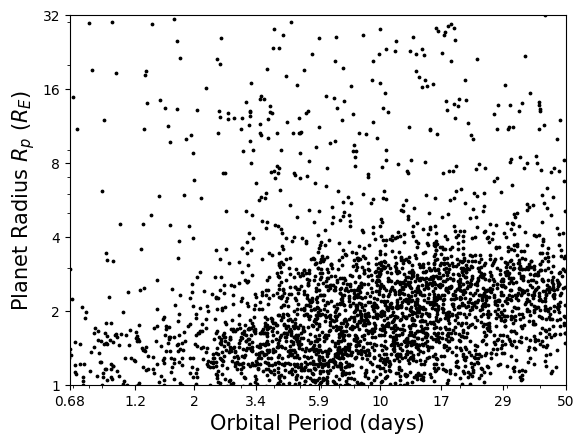

In [266]:
prads = kois_p50['koi_prad']
ppers = kois_p50['koi_period'] 

plt.scatter(ppers, prads, s=3, color='black')

# Set custom x-axis ticks and labels
plt.xscale('log')
xticks = [.68, 1.2, 2, 3.4, 5.9, 10, 17, 29, 50]
plt.xticks(xticks, labels=[str(tick) for tick in xticks])

# Set custom y-axis ticks and labels
plt.yscale('log')
yticks = [1, 2, 4, 8, 16, 32]
plt.yticks(yticks, labels=[str(tick) for tick in yticks])

# Set axis limits
plt.xlim([0.68, 50])
plt.ylim([1, 32])

plt.ylabel('Planet Radius $R_p$ ($R_E$)', fontsize=15)
plt.xlabel('Orbital Period (days)', fontsize=15)

plt.show()

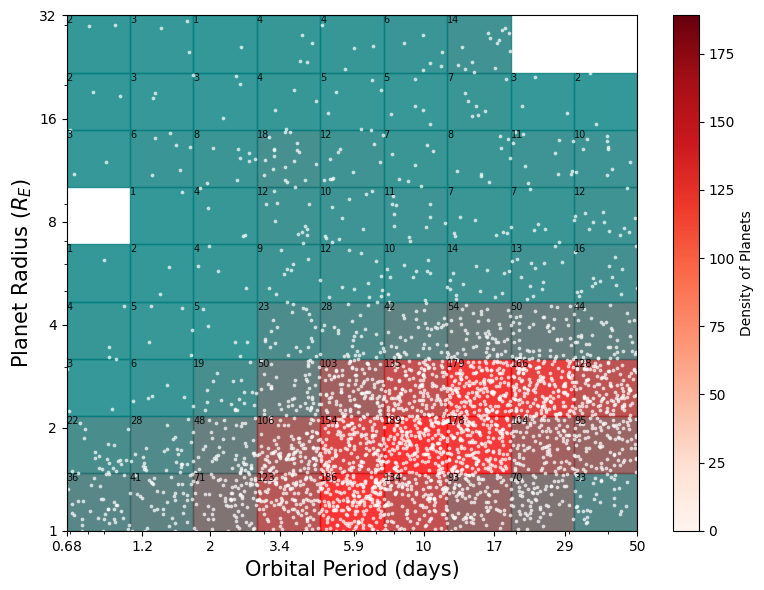

In [295]:
from matplotlib.colors import Normalize

# Example data
prads = kois_p50['koi_prad']
ppers = kois_p50['koi_period']


x_bins = np.logspace(np.log10(0.68), np.log10(50), 10) 
y_bins = np.logspace(np.log10(1), np.log10(32), 10)     
H, xedges, yedges = np.histogram2d(ppers, prads, bins=[x_bins, y_bins])
norm = Normalize(vmin=H.min(), vmax=H.max()) 
#cmap = plt.cm.RdBu_r 
#cmap = plt.cm.Reds
custom_cmap = LinearSegmentedColormap.from_list("TealRed", ["#008080", "#FF0000"], N=256)

plt.figure(figsize=(8, 6))
ax = plt.gca()

for i in range(len(xedges) - 1):
    for j in range(len(yedges) - 1):
        count = H[i, j]
        if count > 0:  
            rect = plt.Rectangle(
                (xedges[i], yedges[j]), 
                xedges[i + 1] - xedges[i],  
                yedges[j + 1] - yedges[j],  
                color=custom_cmap(norm(count)),  
                alpha=0.8 
            )
            ax.add_patch(rect)

# print number of planets in each square in the corner of the square 
for i in range(len(xedges) - 1):
    for j in range(len(yedges) - 1):
        count = int(H[i, j])  
        if count > 0:  
            plt.text(
                xedges[i], yedges[j+1],  
                str(count), 
                fontsize=7, color='black', alpha=0.9, 
                verticalalignment='top', horizontalalignment='left'
            )

# Overlay scatter points
plt.scatter(ppers, prads, s=3, color='white', alpha=0.6)
plt.xscale('log')
plt.yscale('log')

xticks = [.68, 1.2, 2, 3.4, 5.9, 10, 17, 29, 50]
plt.xticks(xticks, labels=[str(tick) for tick in xticks])
yticks = [1, 2, 4, 8, 16, 32]
plt.yticks(yticks, labels=[str(tick) for tick in yticks])
plt.xlim([0.68, 50])
plt.ylim([1, 32])

sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
cb = plt.colorbar(sm, ax=ax)  
cb.set_label('Density of Planets')

plt.xlabel('Orbital Period (days)', fontsize=15)
plt.ylabel('Planet Radius ($R_E$)', fontsize=15)

plt.tight_layout()
plt.show()


#### Commentary on Fig 4

I approximately recreated most of figure four here. At least the main points still get across, even if my version isn't as precise and the contrast is a bit weird. I just really want to finish this because I've been working on this homework since I left class at 11 this morning. 

Anyways, we see a similar distribution to what is in the paper, except with many more points that fill in more of the grid. We also see the central density expanding into lower radius planets, which is probably a result of increased sensitivity and detection rates of smaller planets in the past 10+ years. Particualy, we do notice more planets now in the ranges that were shaded as low sensitivity in the paper, which is what we expect. 

And of course obviously there are more planets out in the previously empty areas of the grid. 